# Signal processing hackathon

Applying machine learning techniques to audio signals

In [1]:
import pandas as pd
import warnings, os
warnings.filterwarnings('ignore')

In [2]:
# import numpy and matplotlib
%pylab inline
rcParams['figure.figsize'] = 20, 5

Populating the interactive namespace from numpy and matplotlib


In [3]:
# standard audio sample rate (samples per second)
sample_rate = 44100.

## Metadata

In [4]:
from metadata import *

In [5]:
# metadata about the people from which recordings are available
people

{'Andrew': {'age': 40,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'Australian'},
 'Gabriele': {'age': 32,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'Italian'},
 'Ivo': {'age': 35,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'Dutch'},
 'Ivo2': {'age': 36,
  'gender': 'male',
  'mood': 'angry',
  'nationality': 'Dutch'},
 'Jelte': {'age': 24,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'Dutch'},
 'Kaustav': {'age': 30,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'Indian'},
 'Leo': {'age': 59,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'Dutch'},
 'Marcel': {'age': 33,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'Dutch'},
 'Nelli': {'age': 35,
  'gender': 'female',
  'mood': 'neutral',
  'nationality': 'Russian'},
 'Ron': {'age': 32,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'Dutch'},
 'Stephen': {'age': 34,
  'gender': 'male',
  'mood': 'neutral',
  'nationality': 'English

In [6]:
# the sentences that have been recorded
sentences

{'s1': 'I want to implement a speech recognition system',
 's2': 'the fourier transform is super cool but rather complex'}

## Read data

In [7]:
# point to folder where data is stored
data_folder = '/Users/ivoeverts/data/accelerator/speech_samples/'

In [8]:
# convert all m4a files in folder to wav with ffmpeg
def m4a2wav(data_folder):
    m4a_list = [os.path.join(data_folder, file_name)
                for file_name in os.listdir(data_folder)
                if file_name.endswith('m4a')]
    for m4a_file in m4a_list:
        print(m4a_file)
        os.system('ffmpeg -y -i {} {}'.format(m4a_file, m4a_file[:-3]+'wav'))

# convert all m4a files
for person in people.keys():
    m4a2wav(os.path.join(data_folder, person))

/Users/ivoeverts/data/accelerator/speech_samples/Andrew/s1.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Andrew/s2.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Ivo/s1.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Ivo/s2.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Jelte/s1.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Jelte/s2.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Kaustav/s1.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Kaustav/s2.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Gabriele/s1.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Gabriele/s2.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Marcel/s1.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Marcel/s2.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Ron/s1.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Ron/s2.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Nelli/s1.m4a
/Users/ivoeverts/data/accelerator/speech_samples/Nelli/s2.m4a
/U

In [12]:
# play a wav file
from IPython.display import *
def play_sound(data):
    global sample_rate
    if type(data) == str:
        return Audio(filename=data, autoplay=False, rate=sample_rate)
    else:
        return Audio(data.astype(int16), autoplay=False, rate=sample_rate)
    
play_sound(os.path.join(data_folder, 'Ron', 's1.wav'))

In [19]:
# play a wave
play_sound((random.rand(100000)*10).astype(int16))

### Build a synthesizer - because we can

In [20]:
# so we can create electronic music!
def sinusoid(t, a, f, o=0):
    return a*sin(f*2*pi*t+o)

def create_sound(num_harmonics, bpm=80, duration=5, noise_easing=True):
    global sample_rate
    wave = zeros(duration*sample_rate)
    t = arange(len(wave))
    # add harmonics
    for i in range(num_harmonics):
        amp = 300 + random.rand() * 300
        frq = .01 + random.rand() * .01
        off = random.rand() * 5
        har = sinusoid(t, amp, frq, off)
        # add noise
        if noise_easing:
            har += 100 * t * random.rand(len(wave)) / max(t)
        wave += har
    # add beat
    beat_duration = int(sample_rate / (2 + random.rand() * 6))
    beat_amp = 2000 + random.rand() * 300
    beat_frq = .00001 + random.rand() * .0001
    beat_pos = int(sample_rate / (bpm / 60.))
    for bp in arange(beat_pos/2, len(wave), beat_pos):
        idx = arange(bp-beat_duration/2, bp+beat_duration/2).astype(int)
        wave[idx] += sinusoid(arange(len(idx)), beat_amp, beat_frq)
    return wave.astype(int16)

In [26]:
play_sound(create_sound(1, bpm=1, duration=3, noise_easing=False))

## Load the speech data

In [27]:
# read a wav file
from scipy.io import wavfile
def read_wave(filepath):
    # sample rate is 44100
    sample_rate, audio_channels = wavfile.read(filepath)
    # return mono signal - there is no difference between left and right
    # and normalize to have 1/-1 as most loud/quite
    return audio_channels[:,0] / float(np.max(np.abs(audio_channels[:,0])))
    
s1 = read_wave(os.path.join(data_folder, 'Nelli', 's1.wav'));
s2 = read_wave(os.path.join(data_folder, 'Gabriele', 's1.wav'));

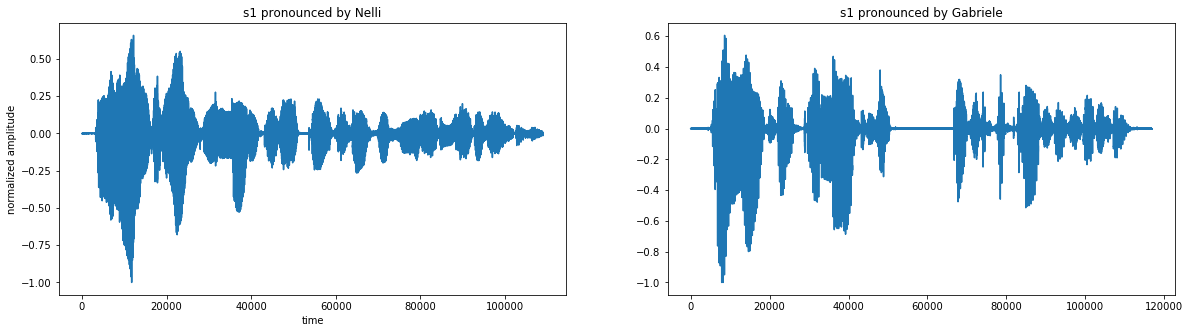

In [28]:
# plot Nelli's first sentence
subplot(121); plot(s1); title('s1 pronounced by Nelli');
xlabel('time'); ylabel('normalized amplitude');
# plot Gabriele's first sentence
subplot(122); plot(s2); title('s1 pronounced by Gabriele');

## Extract features

In [29]:
# extract features from a wave with fft (which is just available due to the pylab namespace)
def fourier_transform(w):
    global sample_rate
    freq_bins = fft.rfftfreq(len(w), 1/sample_rate)
    power = absolute(fft.rfft(w))**2 / len(w)
    return power, freq_bins

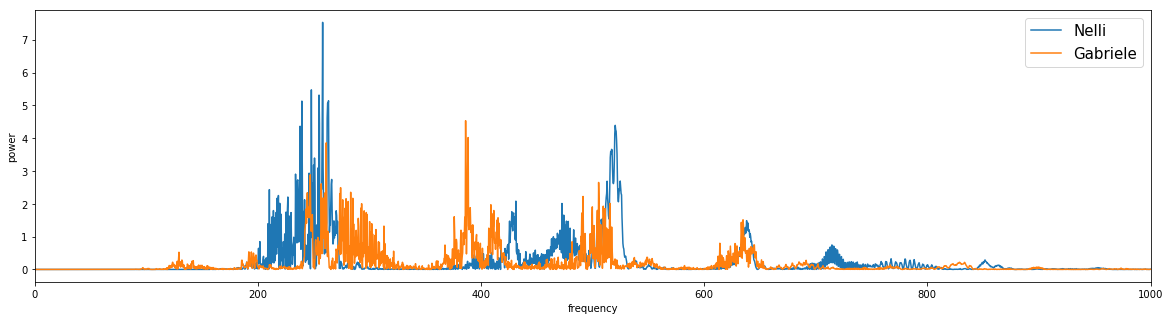

In [30]:
p1, f1 = fourier_transform(s1);
p2, f2 = fourier_transform(s2);
plot(f1, p1, label='Nelli');
plot(f2, p2, label='Gabriele');
pyplot.xlim([0, 1000]); pyplot.legend(fontsize=15);
xlabel('frequency'); ylabel('power');

In [31]:
# feature extraction v1:
# extract the amount of power in a given frequency range
def power_at(power, freq, lbound, hbound):
    lbin = argmin(abs(freq - lbound))
    hbin = argmin(abs(freq - hbound))
    # TODO: correct for exact localization of the l and h frequencies
    return sum(power[lbin:hbin])

# feature extraction v2:
# use the integral representation instead => should be faster
def power_integral_at(pow_int, freq, lbound, hbound):
    lbin = argmin(abs(freq - lbound))
    hbin = argmin(abs(freq - hbound))
    return pow_int[hbin]-pow_int[lbin]

integral = lambda p, f, lb, hb: power_integral_at(p, f, lb, hb)
regular = lambda p, f, lb, hb: power_at(p, f, lb, hb)

# show the similarity! (and slight difference)
p1_int = cumsum(p1)
p2_int = cumsum(p2)
print('regular sum:\t', round(regular(p1, f1, 200, 300),1), round(regular(p2, f2, 200, 300),1))
print('cumulative sum:\t', round(integral(p1_int, f1, 200, 300),1), round(integral(p2_int, f2, 200, 300),1))

regular sum:	 234.3 143.1
cumulative sum:	 234.2 143.4


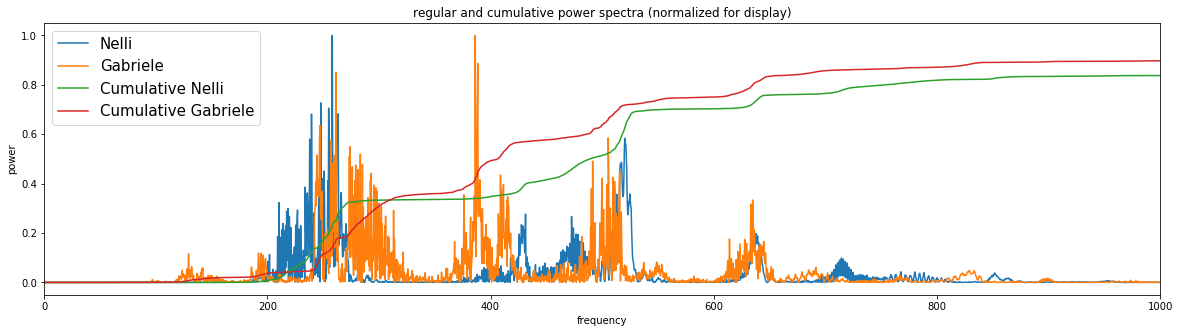

In [32]:
plot(f1, p1/max(p1), label='Nelli');
plot(f2, p2/max(p2), label='Gabriele');
plot(f1, p1_int/max(p1_int), label='Cumulative Nelli');
plot(f2, p2_int/max(p2_int), label='Cumulative Gabriele');
pyplot.xlim([0, 1000]); pyplot.legend(fontsize=15);
xlabel('frequency'); ylabel('power');
title('regular and cumulative power spectra (normalized for display)');

In [33]:
%timeit regular(p1, f1, 200, 50000)

The slowest run took 6.37 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 217 µs per loop


In [34]:
%timeit integral(p1_int, f1, 200, 50000)

The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 190 µs per loop


## Create dataset

In [35]:
# dataset params
freq_step = 100
freq_max = 1000
lbounds = arange(0, freq_max, freq_step)
lbounds

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [36]:
# compute features and labels
features = []
labels = []
# keep waves in memory for later usage
waves = []
for person in people.keys():
    for s in sentences.keys():
        w = read_wave(os.path.join(data_folder, person, '{}.wav'.format(s)));
        p, f = fourier_transform(w)
        p_int = cumsum(p)
        features.append(array([power_integral_at(p_int, f, b, b+freq_step) 
                               for b in lbounds]))
        labels.append([person,
                       people[person]['nationality'],
                       people[person]['gender'],
                       people[person]['mood'],
                       people[person]['age'],
                       s])
        waves.append(w)

In [37]:
# create dataframe
feature_columns = ['f{}'.format(i) for i in range(len(features[0]))]
label_columns = ['name', 'nationality', 'gender', 'mood', 'age', 'sentence']
dataset = pd.DataFrame(data=concatenate((features, labels), axis=1),
                       columns=concatenate((feature_columns, label_columns)))

# normalize the features
from sklearn import preprocessing
dataset[feature_columns] = preprocessing.StandardScaler() \
                           .fit_transform(dataset[feature_columns])

# also include numeric labels
for label in label_columns:
    dataset['n_{}'.format(label)] = preprocessing.LabelEncoder() \
                                    .fit_transform(dataset[label])
    
dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
f0,-0.230249,-0.150944,3.39564,3.03669,-0.423695,-0.438187,-0.453563,-0.450452,-0.388987,-0.444592
f1,-0.987051,-0.8867,1.77115,1.13438,-0.782144,0.805537,-0.258456,-0.205193,-0.770897,-0.630386
f2,-1.5227,-1.43942,0.814834,0.52916,-1.43192,0.011017,-0.341236,1.72072,0.586955,-0.499486
f3,-0.849646,-0.351337,-0.285249,0.974488,-0.772407,2.40543,-0.988175,-0.528329,-0.382776,1.07898
f4,-0.811996,-0.617935,-0.335023,0.764533,-0.938268,2.28435,-0.668037,-0.312133,-0.614486,1.43246
f5,-0.712777,-0.88676,-0.0445137,0.622942,-0.795784,-0.366172,-0.384775,-0.428287,-0.555088,-0.400602
f6,-0.990131,-1.33952,-0.773287,-0.0638143,-0.201802,-0.519748,0.261028,-0.264778,0.733962,3.18287
f7,-0.695896,-0.797029,-1.07945,-0.534587,-0.802999,-0.0096079,0.281242,-0.614356,-0.810317,0.869196
f8,-1.01926,-0.659666,-0.997879,-0.968878,1.0817,0.405951,-0.786849,-0.453515,0.355807,-0.383627
f9,-0.0699304,-0.569634,-0.862569,-0.476952,-0.427379,-0.0339176,-0.6096,-0.12782,-0.774718,-0.269112


In [38]:
# lazy coloring scheme ;)
from sklearn import cluster
colors = cluster.k_means(random.rand(100000,3), len(people))[0]

In [39]:
# wrapper for plotting, using global vars
from sklearn import discriminant_analysis, decomposition

def lda_plot(features=None):
    global dataset, label_columns, feature_columns, colors
    
    if features is None:
        features = dataset[feature_columns]
    
    lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
    rcParams['figure.figsize'] = 20, 8

    for i, label in enumerate(label_columns):
        num_label = 'n_{}'.format(label)
        lda_feats = lda.fit_transform(features,
                                      dataset[num_label])
        subplot(3, 2, i+1)
        if lda_feats.shape[1] == 2:
            x = lda_feats[:,0]
            y = lda_feats[:,1]
        else:
            x = arange(len(lda_feats))
            y = lda_feats

        for j, l in enumerate(unique(dataset[num_label])):
            idx = (dataset[num_label]==l).values
            scatter(x[idx], y[idx], c=colors[j], s=80);

        title(label);
        legend(unique(dataset[label]), loc='best');

    rcParams['figure.figsize'] = 20, 5

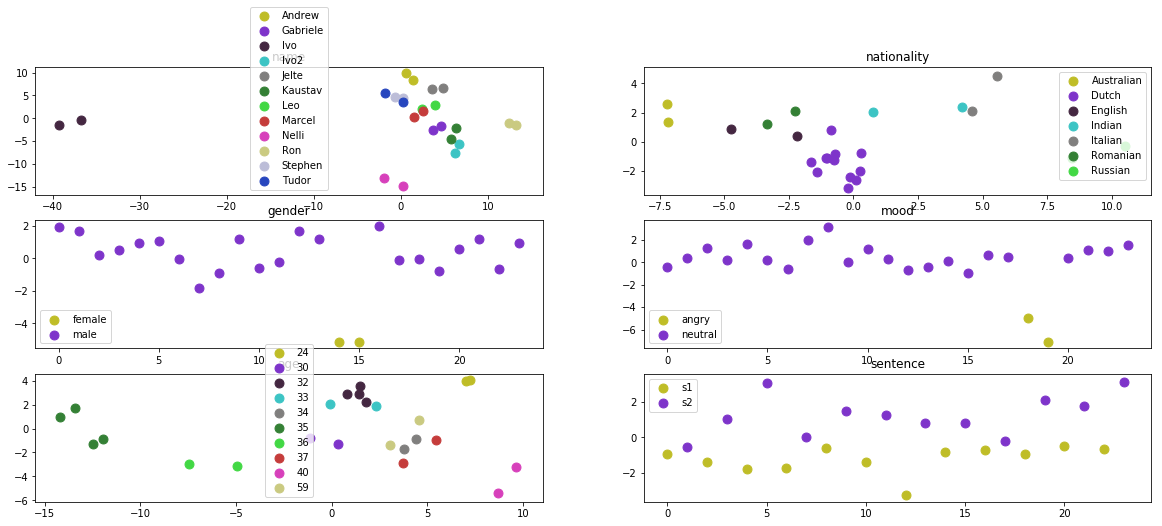

In [40]:
lda_plot()

Distribution of FFT features

## Word tokenization

In [41]:
# how many words in each sentence
len(sentences['s1'].split()), len(sentences['s2'].split())

(8, 9)

In [42]:
# could it be that by convolving with a gaussian derivative filter the zero crossings mark the words...?
from scipy import ndimage

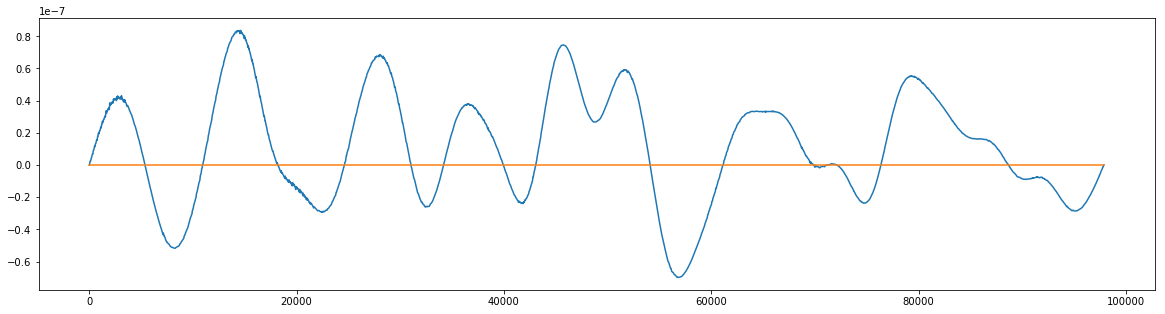

In [49]:
w = waves[0]
dw = ndimage.gaussian_filter1d(w, sample_rate/20, order=1);
plot(dw); plot([0, len(dw)], [0, 0]);

In [54]:
# find close-to-zero derivatives and see if they provide usefull segments
idx = abs(dw)<1e-11
where(idx)[0]

array([    0,  5370, 18169, 24610, 34177, 39948, 61140, 69892, 69893,
       71114, 71115, 71116, 71117, 71118, 71119, 71120, 71121, 71122,
       71123, 71124, 71125, 71126, 71127, 72142, 72143, 72144, 76361,
       88659, 88660, 97873])

In [56]:
# hm
play_sound(w[76361:88659]*500)

Nevermind the word tokenization ;)

## Bag-of-Words

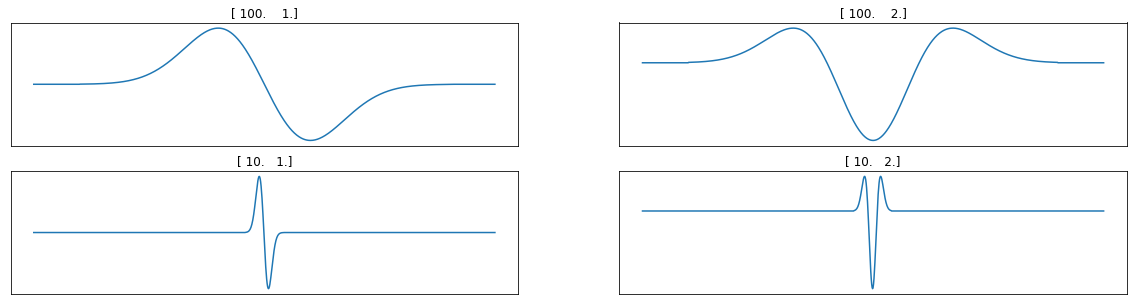

In [57]:
# use a filterbank of gaussian derivatives ('njet') for feature extraction
import scipy.ndimage as ndi
def apply_filter_bank(signal):
    # use 2 different filter sizes
    stds = array([1e-1, 1e-2]) * 1000
    # use 2 differential orders
    orders = [1,2]
    # store result
    f = []
    params = []
    for s in stds:
        for o in orders:
            f.append(ndi.gaussian_filter(signal, s, o))
            params.append([s,o])
    return array(f), array(params)

# show the filters by convolving with a spike
spike = zeros(1001); spike[500] = 1;
f_spikes, params = apply_filter_bank(spike)
for i, f_spike in enumerate(f_spikes):
    subplot(2, 2, i+1);
    extend = 150*int(params[i,0])
    plot(f_spike[len(f_spike)/2-extend:len(f_spike)/2+extend]);
    xticks([]); yticks([]);
    title(params[i,:])

Gaussian filters with different scales and differential orders

In [58]:
# extract 'local features':
# apply the filter bank and summarize the filter output with aggs over regions of size fsize in steps of size step
def extract_local_features(signal,
                           fsize=int(sample_rate/8), step=int(sample_rate/32), aggs=[max],
                           standardize=True):
    f_signal = apply_filter_bank(signal)[0]
    samples = arange(0, len(signal)-fsize/2, step).astype('int')
    feats = zeros((len(samples), f_signal.shape[0]*len(aggs)))
    n_row = 0
    for i in samples:
        n_col = 0
        for agg in aggs:
            for f in f_signal[:, i:i+fsize]:
                feats[n_row, n_col] = agg(f)
                n_col += 1
        n_row += 1
    return preprocessing.StandardScaler().fit_transform(feats) if standardize else feats

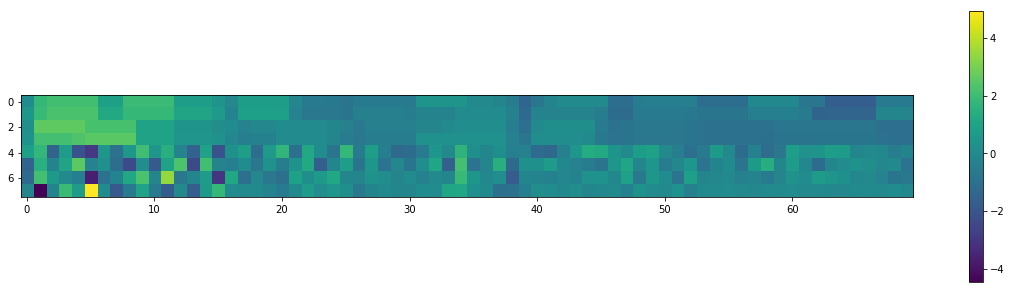

In [59]:
# look at 1 example
feats = extract_local_features(waves[0], aggs=[max, mean])
imshow(feats.T)
colorbar();

In [60]:
# extract all local features
def extract_local_features_wrapper(i):
    global waves
    return extract_local_features(waves[i], standardize=False)

# feature extraction is heavy - hooray to multiprocessing
from multiprocessing import Pool
thread_pool = Pool(6)
all_local_feats = thread_pool.map(extract_local_features_wrapper, range(len(waves)));

In [61]:
# create vocabulary
k = 10
n_feats_per_sample = 50
feats_for_clustering = zeros((n_feats_per_sample*len(waves),
                              all_local_feats[0].shape[1]))

# harvest features for clustering
for i, local_feats in enumerate(all_local_feats):
    feats_for_clustering[i*n_feats_per_sample:(i+1)*n_feats_per_sample,:] = \
                         random.permutation(local_feats)[:n_feats_per_sample]

# train standard scaler
bow_scaler = preprocessing.StandardScaler().fit(feats_for_clustering)
        
# kmeans object for clustering
vocab = cluster.KMeans(n_clusters=k)
vocab.fit(bow_scaler.transform(feats_for_clustering))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
# use the vocab for quantizing the local features into a fixed-length representation
bow_feats = zeros((len(waves), k))
for i, local_feats in enumerate(all_local_feats):
    bow_hist, _ = histogram(vocab.predict(bow_scaler.transform(local_feats)), k)
    bow_feats[i,:] = preprocessing.normalize(bow_hist.reshape(1,-1))
bow_feats.shape

(24, 10)

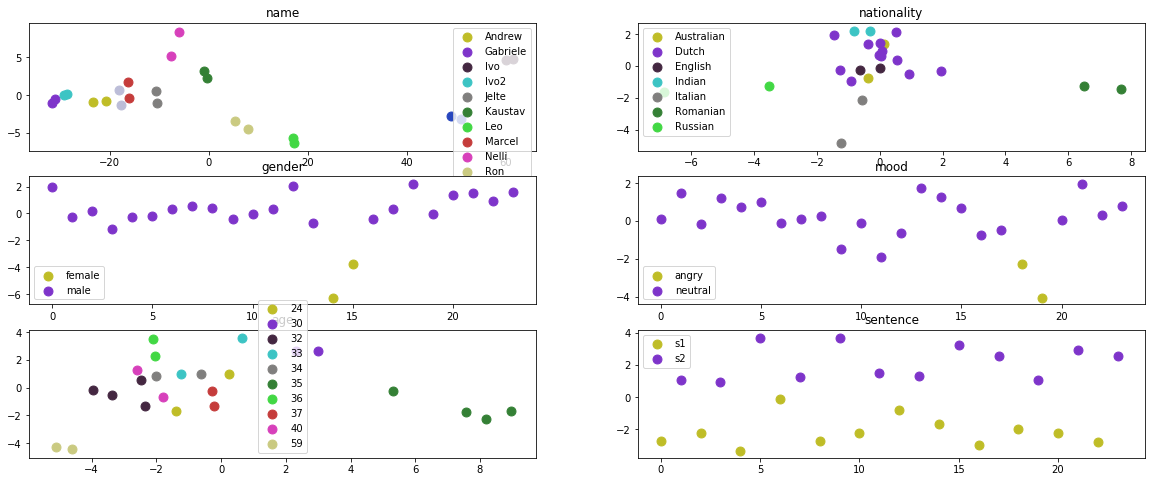

In [63]:
# show 'm
lda_plot(bow_feats)

Distribution of BoW features

## Let's do a round of classification

In [64]:
# using leave-1-out model validation with your favorite classifier and normalizer
from sklearn import neighbors, cross_validation, svm
def l1o_val(data, labels,
            classifier = neighbors.KNeighborsClassifier(1),
            normalizer = preprocessing.StandardScaler()):
    if isinstance(data, pd.DataFrame): # hack of the year
        data = data.values.astype('float')
    l1o = cross_validation.LeaveOneOut(data.shape[0])
    predictions = np.zeros(labels.shape, dtype=labels.dtype)
    for train_idx, test_idx in l1o:
        if isinstance(normalizer, discriminant_analysis.LinearDiscriminantAnalysis):
            train_data = normalizer.fit_transform(data[train_idx], labels[train_idx])
        else:
            train_data = normalizer.fit_transform(data[train_idx])
        classifier.fit(train_data, labels[train_idx])
        predictions[test_idx] = classifier.predict(normalizer.transform(data[test_idx]))
    return sum(predictions == labels) / float(data.shape[0])

/Users/ivoeverts/miniconda2/envs/dsp/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Experiment with raw features / pca / lda

In [65]:
pca = decomposition.PCA(n_components=6)
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=6)
for label in label_columns:
    labels = dataset['n_{}'.format(label)]
    fft_res = l1o_val(dataset[feature_columns], labels)
    bow_res = l1o_val(bow_feats, labels)
    fft_res_pca = l1o_val(dataset[feature_columns], labels, normalizer=pca)
    bow_res_pca = l1o_val(bow_feats, labels, normalizer=pca)
    fft_res_lda = l1o_val(dataset[feature_columns], labels, normalizer=lda)
    bow_res_lda = l1o_val(bow_feats, labels, normalizer=lda)
    print('***', label, '***')
    print('fft: {:.2f}/{:.2f}/{:.2f}, bow: {:.2f}/{:.2f}/{:.2f}\n'\
          .format(fft_res, fft_res_pca, fft_res_lda, bow_res, bow_res_pca, bow_res_lda))

*** name ***
fft: 0.25/0.21/0.29, bow: 0.25/0.21/0.33

*** nationality ***
fft: 0.46/0.50/0.58, bow: 0.42/0.50/0.38

*** gender ***
fft: 0.96/0.96/0.96, bow: 1.00/0.92/0.88

*** mood ***
fft: 0.92/0.88/0.83, bow: 0.88/0.88/0.75

*** age ***
fft: 0.29/0.21/0.29, bow: 0.25/0.21/0.29

*** sentence ***
fft: 0.58/0.58/0.58, bow: 0.50/0.62/0.83



Lot of info is destroyed by chopping up the signal and throwing the features in an orderless bag-of-words, but lda might save the day. Main message: try out several combinations and parameters and pick the best one for your problem.

Note that LDA suffers greatly from leaving-one-out.

### Extract features with convolution while preserving feature order (i.e. discard BoW)

In [68]:
def extract_sequential_local_features_wrapper(i):
    global waves
    w = waves[i]
    return extract_local_features(w, fsize=int(len(w)/10), step=int(len(w)/10), standardize=False).flatten()

# feature extraction is heavy - hooray to multiprocessing
thread_pool = Pool(6)
local_seq_feats = thread_pool.map(extract_sequential_local_features_wrapper, range(len(waves)));

In [69]:
seq_feats = preprocessing.StandardScaler().fit_transform(array(local_seq_feats))
seq_feats.shape

(24, 40)

In [71]:
# compare fft with bow and conv features
seq_pca = decomposition.PCA(n_components=15)
seq_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=15)
for label in label_columns:
    labels = dataset['n_{}'.format(label)]
    fft_res = l1o_val(dataset[feature_columns], labels)
    fft_res_pca = l1o_val(dataset[feature_columns], labels, normalizer=pca)
    fft_res_lda = l1o_val(dataset[feature_columns], labels, normalizer=lda)
    bow_res = l1o_val(bow_feats, labels)
    bow_res_pca = l1o_val(bow_feats, labels, normalizer=pca)
    bow_res_lda = l1o_val(bow_feats, labels, normalizer=lda)
    seq_res = l1o_val(seq_feats, labels)
    seq_res_pca = l1o_val(seq_feats, labels, normalizer=seq_pca)
    seq_res_lda = l1o_val(seq_feats, labels, normalizer=seq_lda)
    print('***', label, '***')
    print('fft: {:.2f}/{:.2f}/{:.2f}, bow: {:.2f}/{:.2f}/{:.2f}, seq: {:.2f}/{:.2f}/{:.2f}\n'\
          .format(fft_res, fft_res_pca, fft_res_lda,\
                  bow_res, bow_res_pca, bow_res_lda,\
                  seq_res, seq_res_pca, seq_res_lda))

*** name ***
fft: 0.25/0.21/0.29, bow: 0.25/0.21/0.33, seq: 0.08/0.04/0.08

*** nationality ***
fft: 0.46/0.50/0.58, bow: 0.42/0.50/0.38, seq: 0.21/0.17/0.17

*** gender ***
fft: 0.96/0.96/0.96, bow: 1.00/0.92/0.88, seq: 0.96/0.92/0.92

*** mood ***
fft: 0.92/0.88/0.83, bow: 0.88/0.88/0.75, seq: 0.92/0.92/0.92

*** age ***
fft: 0.29/0.21/0.29, bow: 0.25/0.21/0.29, seq: 0.12/0.08/0.04

*** sentence ***
fft: 0.58/0.58/0.58, bow: 0.50/0.62/0.83, seq: 0.92/0.88/0.92



Sometimes better than BoW indeed. The feature type depends on the problem!

## Convolutional neural networks

In [72]:
# lets try to do similar stuff with a convnet
from keras.layers.convolutional import Convolution1D
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Dropout

Using TensorFlow backend.


In [73]:
# use fixed length waves
max_duration = max([len(w) for w in waves])
pwaves = array([concatenate((w, zeros((max_duration-len(w),)))) for w in waves])
pwaves = pwaves.reshape(pwaves.shape + (1,))
pwaves.shape

(24, 181248, 1)

In [74]:
# convert labels (sentence1/sentence2) to something keras understands
from keras.utils.np_utils import to_categorical
keras_labels = to_categorical(dataset['n_sentence'].astype('int'), 2)

In [93]:
# build the model for classifying into 2 classes (sentence 1 and sentence 2)
num_filters = 2
filter_size = 3
model = Sequential()
model.add(Convolution1D(num_filters, filter_size, input_dim=1, input_length=max_duration))
model.add(Flatten())
model.add(Dense(2)) # s1/s2
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [94]:
# fit the model using train- and validation- data
model.fit(pwaves[:16], keras_labels[:16],
          batch_size=4,
          nb_epoch=3,
          validation_data=(pwaves[16:20], keras_labels[16:20]));

Train on 16 samples, validate on 4 samples
Epoch 1/3
16/16 [==============================] - 0s - loss: 0.7143 - acc: 0.5000 - val_loss: 0.9278 - val_acc: 0.2500
Epoch 2/3
16/16 [==============================] - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 1.2289 - val_acc: 0.2500
Epoch 3/3
16/16 [==============================] - 0s - loss: 2.2527e-04 - acc: 1.0000 - val_loss: 1.5167 - val_acc: 0.2500

In [95]:
# see if the model can classify the test data
res = model.evaluate(pwaves[20:], keras_labels[20:], verbose=0)
for i, m in enumerate(model.metrics_names):
    print(m, res[i])

loss 1.69304645061
acc 0.5


#### Visualize the convolution filters

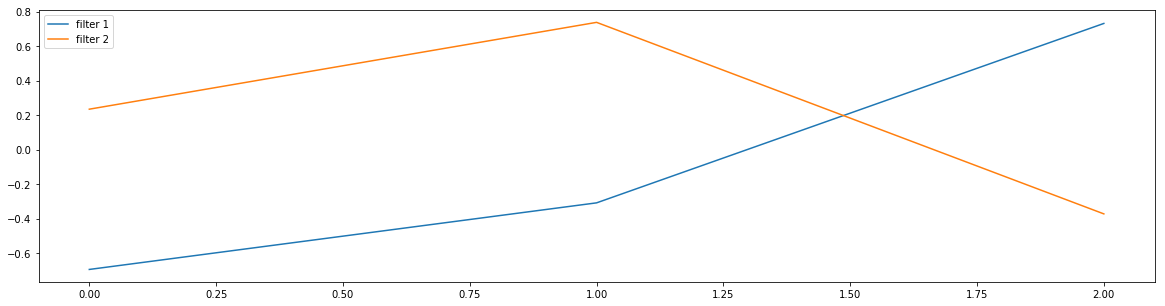

In [96]:
filters = model.layers[0].get_weights()
for i, f in enumerate(filters[0].reshape(filter_size, num_filters).T):
    plot(f, label='filter {}'.format(i+1))
legend();

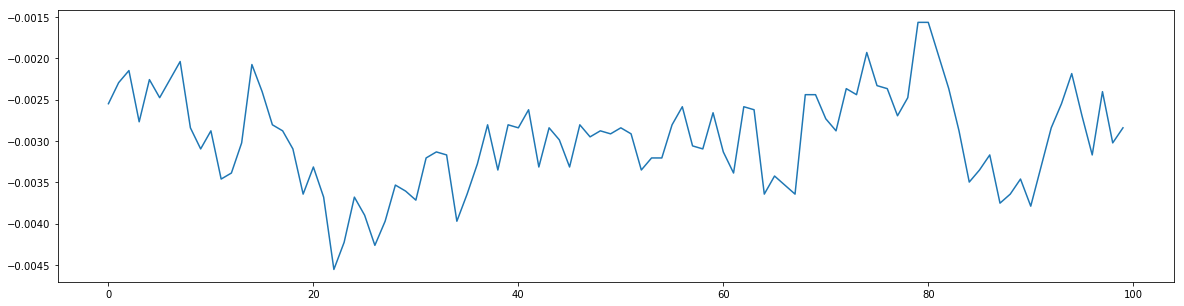

In [97]:
plot(pwaves[0][1000:1100]);

If you make the filters larger, they will start resembling this speech sample